In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder

# 1. Loading the dataset and understanding data

In [2]:
df = pd.read_csv('../data/heart_attack_prediction_dataset.csv')

## 1.1 preview of the first 5 rows of data

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## 1.2 Shape of data

In [4]:
df.shape

(8763, 26)

## 1.3 Datatype of columns

In [5]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

## 1.4 Checking for the null value

In [6]:
df.isna().sum()
# data is clean

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

## 1.5 Number of unique values in each column

In [7]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [8]:
df['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# clean up

def clean_my_columns_titles(df):
    df.columns = df.columns.str.replace(" ","_").str.lower().str.strip() 
    return df   

In [11]:
clean_my_columns_titles(df)
df.head(3)

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0


In [12]:
df['systolic_pressure']=df['blood_pressure'].apply(lambda x: int(x.split("/")[0]))
df['diastolic_pressure']=df['blood_pressure'].apply(lambda x: int(x.split("/")[1]))

In [13]:
list_high = [0,120, 130,140,max(df.systolic_pressure)]
classif = [0, 1, 10, 100] # 0 is normal, 1 is elevated, 10 is hyper level 1, 100 is hyper level 2
list_low = [0,80, 90,100,max(df.diastolic_pressure)]

df['systolic_classes'] = pd.cut(df['systolic_pressure'], 4, labels=classif).astype(int)
df['diastolic_classes'] = pd.cut(df['diastolic_pressure'], 4, labels=classif).astype(int)

In [14]:
def check_pressure(x):
    if x >= 100:
        return 3
    elif x>= 10:
        return 2
    elif x>= 1:
        return 1
    elif x == 0:
        return 0

In [15]:
df['blood_pressure_class']= df['systolic_classes']+df['diastolic_classes']
df['blood_pressure_class']=df['blood_pressure_class'].apply(check_pressure)
df['blood_pressure_class'].value_counts()

blood_pressure_class
3    3925
2    2607
1    1645
0     586
Name: count, dtype: int64

In [16]:
df['diet_label'] = df['diet'].replace(
    {
        'Healthy':0,
        'Average':1,
        'Unhealthy':2,
        }
    )
df.head()

C:\Users\54189\AppData\Local\Temp\ipykernel_8436\234279105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diet_label'] = df['diet'].replace(


,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure,systolic_classes,diastolic_classes,blood_pressure_class,diet_label
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,Argentina,South America,Southern Hemisphere,0,158,88,100,10,3,1
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,Canada,North America,Northern Hemisphere,0,165,93,100,10,3,2
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,France,Europe,Northern Hemisphere,0,174,99,100,100,3,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,Canada,North America,Northern Hemisphere,0,163,100,100,100,3,1
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,Thailand,Asia,Northern Hemisphere,0,91,88,0,10,2,2


In [17]:
df['sex'] = df['sex'].replace(
    {'Female':0,
    'Male':1}
)

C:\Users\54189\AppData\Local\Temp\ipykernel_8436\4200437369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(


In [18]:
df = df.drop(columns=['patient_id','blood_pressure','diet','country','continent','hemisphere','systolic_pressure','diastolic_pressure','systolic_classes','diastolic_classes'])

In [19]:
df.head(3)

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,blood_pressure_class,diet_label
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,3,1
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,3,2
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,3,0


# T-test (target: heart attack risk)

In [20]:
#Check for normality of the data
from scipy.stats import shapiro

In [21]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        stat, p_value = shapiro(df[column])
        print(f"Column: {column}, Shapiro-Wilk Test - Test Statistic: {stat}, p-value: {p_value}, Normal Distribution: {p_value > 0.05}")

Column: age, Shapiro-Wilk Test - Test Statistic: 0.9527395147647509, p-value: 1.8992837622596378e-46, Normal Distribution: False
Column: sex, Shapiro-Wilk Test - Test Statistic: 0.5773402167396835, p-value: 3.292423930672572e-90, Normal Distribution: False
Column: cholesterol, Shapiro-Wilk Test - Test Statistic: 0.9562442810426621, p-value: 3.5372951140315544e-45, Normal Distribution: False
Column: heart_rate, Shapiro-Wilk Test - Test Statistic: 0.953423667328676, p-value: 3.3139916738024245e-46, Normal Distribution: False
Column: diabetes, Shapiro-Wilk Test - Test Statistic: 0.6019984858215629, p-value: 8.231681807403725e-89, Normal Distribution: False
Column: family_history, Shapiro-Wilk Test - Test Statistic: 0.6365538504528228, p-value: 1.015312803273565e-86, Normal Distribution: False
Column: smoking, Shapiro-Wilk Test - Test Statistic: 0.34831613581191745, p-value: 1.3141532287813958e-100, Normal Distribution: False
Column: obesity, Shapiro-Wilk Test - Test Statistic: 0.636622496

C:\Users\54189\AppData\Local\Temp\ipykernel_8436\1087359518.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8763.
  stat, p_value = shapiro(df[column])


All the columns are not with a normal distribution. So we can't use T-test.

# Mann-Whitney U

In [22]:
from scipy.stats import mannwhitneyu

In [23]:
continuous_col = ['age','cholesterol','heart_rate','exercise_hours_per_week','sedentary_hours_per_day','bmi','triglycerides','heart_attack_risk']

In [24]:
group_0_data = df[df['heart_attack_risk'] == 0] 
group_1_data = df[df['heart_attack_risk'] != 0]

In [25]:
results = {}

for var in continuous_col:
    statistic, p_value = mannwhitneyu(group_0_data[var], group_1_data[var])
    
    results[var] = {'Mann-Whitney U statistic': statistic, 'p-value': p_value}

alpha = 0.05

for var, result in results.items():
    print(f"{var}: Mann-Whitney U statistic={result['Mann-Whitney U statistic']}, p-value={result['p-value']}")
    if result['p-value'] < alpha:
        print(f"At the significance level {alpha}, reject the null hypothesis, indicating a significant difference in the median of {var} between the two groups.")
    else:
        print(f"At the significance level {alpha}, fail to reject the null hypothesis, indicating no significant difference in the median of {var} between the two groups.")

age: Mann-Whitney U statistic=8758540.0, p-value=0.5473012044723317
At the significance level 0.05, fail to reject the null hypothesis, indicating no significant difference in the median of age between the two groups.
cholesterol: Mann-Whitney U statistic=8622040.0, p-value=0.07124700987067507
At the significance level 0.05, fail to reject the null hypothesis, indicating no significant difference in the median of cholesterol between the two groups.
heart_rate: Mann-Whitney U statistic=8873667.5, p-value=0.6801970648094233
At the significance level 0.05, fail to reject the null hypothesis, indicating no significant difference in the median of heart_rate between the two groups.
exercise_hours_per_week: Mann-Whitney U statistic=8708192.0, p-value=0.29594967806200967
At the significance level 0.05, fail to reject the null hypothesis, indicating no significant difference in the median of exercise_hours_per_week between the two groups.
sedentary_hours_per_day: Mann-Whitney U statistic=888763

# Balance the dataset

In [26]:
df['heart_attack_risk'].value_counts()

heart_attack_risk
0    5624
1    3139
Name: count, dtype: int64

In [27]:
# balance the dataset
df['heart_attack_risk'].value_counts()

heart_attack_risk
0    5624
1    3139
Name: count, dtype: int64

In [28]:
df_risk = df[df['heart_attack_risk']==1]
df_risk

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,blood_pressure_class,diet_label
5,54,0,297,48,1,1,1,0,1,0.625008,...,2,7.798752,241339,20.146840,795,5,10,1,3,2
6,90,1,358,84,0,0,1,0,1,4.098177,...,7,0.627356,190450,28.885811,284,4,10,1,1,0
7,84,1,220,107,0,0,1,1,1,3.427929,...,4,10.543780,122093,22.221862,370,6,7,1,1,1
12,77,1,228,68,1,1,1,1,1,19.633268,...,9,10.917524,29886,35.102236,590,7,6,1,0,2
13,60,1,259,85,1,1,1,0,1,17.037374,...,1,8.727417,292173,25.564897,506,1,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,82,1,311,87,0,1,1,1,1,8.202449,...,7,8.402977,141521,27.694240,515,1,5,1,3,2
8754,80,0,383,91,1,1,1,0,1,6.082656,...,3,8.234883,101341,20.490450,174,3,4,1,2,0
8756,22,1,347,108,0,1,1,0,1,3.820772,...,1,6.786750,230235,20.295054,641,2,9,1,2,0
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,3,1


In [29]:
df_non_risk = df[df['heart_attack_risk']==0]
df_non_risk

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,blood_pressure_class,diet_label
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,3,1
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,3,2
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,3,0
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,3,1
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,25,1,307,78,0,1,1,0,1,3.272202,...,3,10.516775,79211,33.469360,296,7,5,0,2,1
8757,59,0,378,99,0,1,1,1,0,1.857908,...,4,7.495231,70415,39.976061,158,1,9,0,1,0
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,1,0
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,3,0


In [30]:
df_non_risk=df_non_risk[:3139]
df_non_risk

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,blood_pressure_class,diet_label
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,3,1
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,3,2
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,3,0
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,3,1
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,75,1,135,54,0,0,1,0,0,15.432331,...,8,4.340246,261312,35.167991,433,6,5,0,2,0
4891,61,0,228,96,1,1,1,0,1,3.347094,...,1,7.954456,103984,23.158742,497,2,9,0,2,1
4892,77,1,254,60,1,1,1,0,1,11.133957,...,10,2.586706,299416,32.879864,280,1,6,0,3,0
4893,41,0,254,92,1,1,1,1,1,0.833281,...,3,10.352167,174233,33.284321,221,1,8,0,3,1


In [31]:
df_demo = pd.concat([df_risk,df_non_risk])
df_demo

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,blood_pressure_class,diet_label
5,54,0,297,48,1,1,1,0,1,0.625008,...,2,7.798752,241339,20.146840,795,5,10,1,3,2
6,90,1,358,84,0,0,1,0,1,4.098177,...,7,0.627356,190450,28.885811,284,4,10,1,1,0
7,84,1,220,107,0,0,1,1,1,3.427929,...,4,10.543780,122093,22.221862,370,6,7,1,1,1
12,77,1,228,68,1,1,1,1,1,19.633268,...,9,10.917524,29886,35.102236,590,7,6,1,0,2
13,60,1,259,85,1,1,1,0,1,17.037374,...,1,8.727417,292173,25.564897,506,1,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,75,1,135,54,0,0,1,0,0,15.432331,...,8,4.340246,261312,35.167991,433,6,5,0,2,0
4891,61,0,228,96,1,1,1,0,1,3.347094,...,1,7.954456,103984,23.158742,497,2,9,0,2,1
4892,77,1,254,60,1,1,1,0,1,11.133957,...,10,2.586706,299416,32.879864,280,1,6,0,3,0
4893,41,0,254,92,1,1,1,1,1,0.833281,...,3,10.352167,174233,33.284321,221,1,8,0,3,1


In [32]:
df_demo['heart_attack_risk'].value_counts()

heart_attack_risk
1    3139
0    3139
Name: count, dtype: int64

In [33]:
features2 = df_demo.drop(columns='heart_attack_risk')
target2 = df_demo['heart_attack_risk']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features2, target2, test_size=0.20, random_state=0)

In [35]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm,columns=X_test.columns)

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(X_train_norm,y_train)

LogisticRegression()

In [38]:
pred_lr=lr.predict(X_test_norm)

In [39]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.47      0.48      0.48       628
           1       0.47      0.46      0.47       628

    accuracy                           0.47      1256
   macro avg       0.47      0.47      0.47      1256
weighted avg       0.47      0.47      0.47      1256



In [40]:
confusion_matrix(y_test,pred_lr)

array([[303, 325],
       [337, 291]], dtype=int64)

<Axes: >

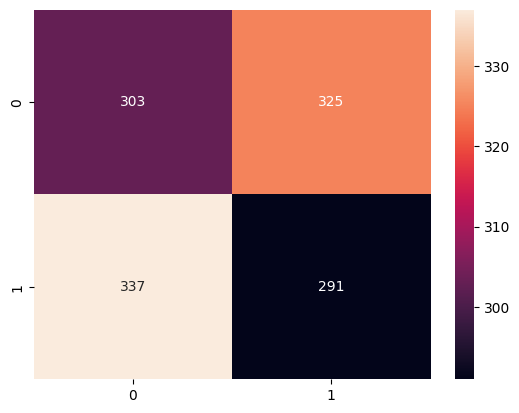

In [41]:
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True,fmt='g')

In [42]:
df2=features2.copy()
df2['heart_attack_risk']=target2

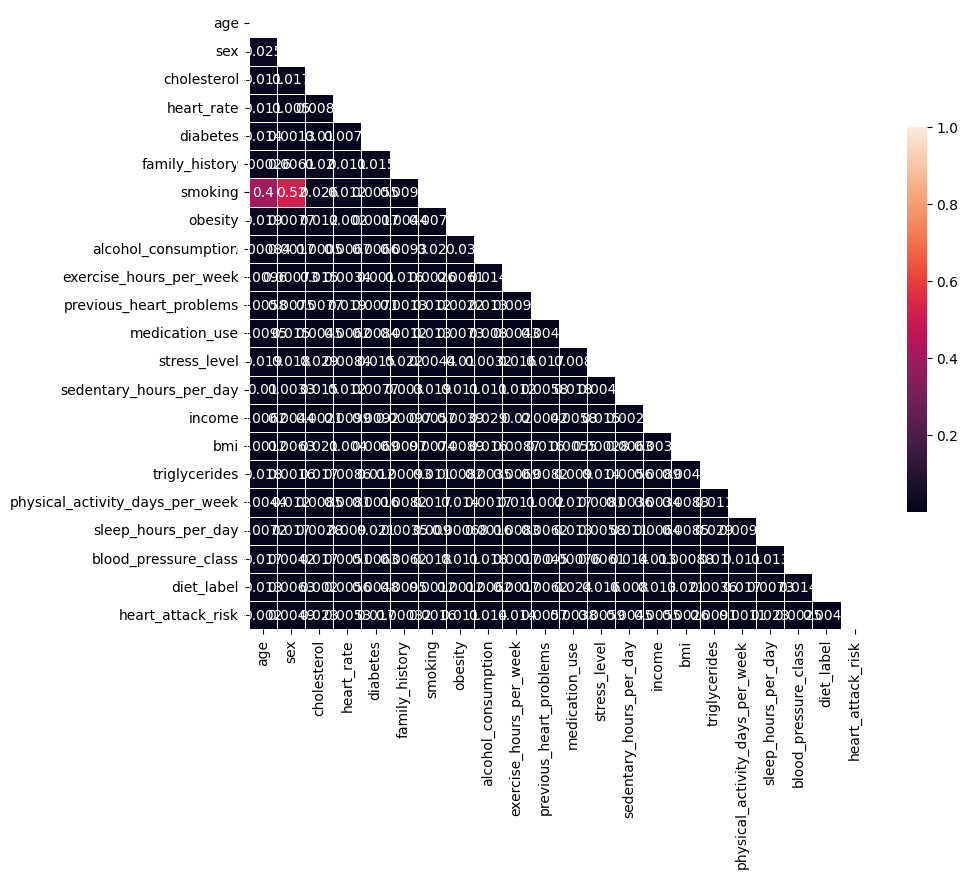

In [43]:
corr=np.abs(df2.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

# 2. Exploratory Data Analysis

## 2.1 Separating the columns in categorical and continuous

In [44]:
# how to deal with the 'Blood pressure' and 'diet' ?

features = ['Age', 'Cholesterol', 'Heart Rate','Diabetes','Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Exercise Hours Per Week','Previous Heart Problems', 'Medication Use', 'Stress Level','Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides','Physical Activity Days Per Week', 'Sleep Hours Per Day']

list_continuous = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides','Physical Activity Days Per Week', 'Sleep Hours Per Day']

list_categorical = ['Sex','Diabetes','Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet','Previous Heart Problems', 'Medication Use', 'Stress Level', 'Country', 'Continent','Hemisphere']

## 2.2 Count plot of categorical features

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=len(list_categorical), ncols=1, figsize=(8, 6 * len(list_categorical)))

# Iterate over categorical features and plot count plot for each
for i, cat_feature in enumerate(list_categorical):
    sns.countplot(x=cat_feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Categorical Feature')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count Plot of {cat_feature}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 2.3 Correlation matrix of continuous features

In [ ]:
# Create df with continuous features
continuous_df = df[list_continuous]
continuous_df['Heart Attack Risk'] = df['Heart Attack Risk']
continuous_df.head(3)

In [ ]:
import numpy as np

In [ ]:
# Calculate correlation matrix
corr_matrix = np.abs(continuous_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr_matrix)

plt.show()

T-test (compare with two groups)

t-test -> Heart-attack vs no Heart attack + numerical continuous variable with a normal distribution

Mann Whitney U Test -> Heart-attack vs no Heart attack + numerical continuous variable

## 2.4 Heatmap of dataframe

In [ ]:
features_df = df[features]
features_df['Heart Attack Risk'] = df['Heart Attack Risk']
features_df.head(3)

In [ ]:
# Calculate correlation matrix
corr_matrix2 = features_df.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# sns.pairplot(df, hue="Heart Attack Risk")